<a href="https://colab.research.google.com/github/Saymanning/Honey_Bee_Colony_Loss_US/blob/Machine-Learning/FBprophet_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install prophet

     |████████████████████████████████| 65 kB 2.2 MB/s 
     |████████████████████████████████| 49 kB 4.7 MB/s 
     |████████████████████████████████| 179 kB 13.4 MB/s 


In [102]:
import pandas as pd
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot

In [103]:
data = "https://raw.githubusercontent.com/Saymanning/Honey_Bee_Colony_Loss_US/main/Resources/Clean_Bee_Pop.csv"

In [105]:
# Import our input dataset
Clean_Bee_Pop_df = pd.read_csv(data)
Clean_Bee_Pop_df.head()

,Year,State,colonies,Maximum_colonies1,Lost_colonies,Percent_lost2,Varroa_mites,Other_parasites,Diseases,Pestticides,Other3,Unknown,POPULATION
0,2015,AL,8000,8000,610,8,3,6,0,0,3,2,4852347
1,2015,AZ,36000,39000,12000,31,50,2,1,4,1,16,6829676
2,2015,AR,23000,27000,2400,9,38,10,0,8,9,1,2978048
3,2015,CA,750000,1260000,149000,12,37,13,6,12,11,7,38918045
4,2015,CO,24000,24000,2500,10,48,24,21,20,8,2,5450623


In [106]:
# load the dataset
from pandas import read_csv
# load data
path = "https://raw.githubusercontent.com/Saymanning/Honey_Bee_Colony_Loss_US/main/Resources/Clean_Bee_Pop.csv"
df = read_csv(path, header=0)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())

(225, 13)
   Year State  colonies  ...  Other3  Unknown  POPULATION
0  2015    AL      8000  ...       3        2     4852347
1  2015    AZ     36000  ...       1       16     6829676
2  2015    AR     23000  ...       9        1     2978048
3  2015    CA    750000  ...      11        7    38918045
4  2015    CO     24000  ...       8        2     5450623

[5 rows x 13 columns]


In [107]:
df.drop(['State','colonies','Maximum_colonies1','Percent_lost2','Varroa_mites','Other_parasites','Diseases','Pestticides','Other3','Unknown'],axis=1, inplace=True)

In [108]:
df.head()

,Year,Lost_colonies,POPULATION
0,2015,610,4852347
1,2015,12000,6829676
2,2015,2400,2978048
3,2015,149000,38918045
4,2015,2500,5450623


In [109]:
df.drop('POPULATION',axis=1, inplace=True)

In [110]:
df.head()

,Year,Lost_colonies
0,2015,610
1,2015,12000
2,2015,2400
3,2015,149000
4,2015,2500


In [111]:
# summarize shape
print(df.shape)
# show first few rows
print(df.head())

(225, 2)
   Year  Lost_colonies
0  2015            610
1  2015          12000
2  2015           2400
3  2015         149000
4  2015           2500


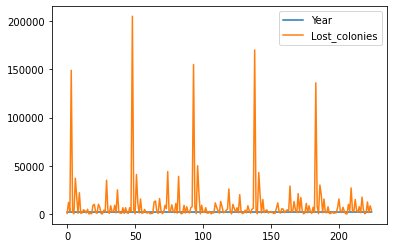

In [112]:
# plot the time series
df.plot()
pyplot.show()

In [113]:
# prepare expected column names
df.columns = ['ds', 'y']

In [114]:
df.head()

,ds,y
0,2015,610
1,2015,12000
2,2015,2400
3,2015,149000
4,2015,2500


In [127]:
# define the model
model = Prophet()
# fit the model
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [139]:
### Extending data to few future dates
future = m.make_future_dataframe(periods=365, freq='M')
print("type of future" , type(future))

type of future <class 'pandas.core.frame.DataFrame'>


In [140]:
future.tail()

,ds
365,2000-01-31 00:00:00.000002019
366,2000-02-29 00:00:00.000002019
367,2000-03-31 00:00:00.000002019
368,2000-04-30 00:00:00.000002019
369,2000-05-31 00:00:00.000002019


In [144]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01 00:00:00.000002015,-34146.751164,-56890.941215,4678.549659,-34146.751164,-34146.751164,7709.368882,7709.368882,7709.368882,7709.368882,7709.368882,7709.368882,0.0,0.0,0.0,-26437.382282
1,1970-01-01 00:00:00.000002016,-34146.751164,-55305.255078,5031.505816,-34146.751164,-34146.751164,7709.368882,7709.368882,7709.368882,7709.368882,7709.368882,7709.368882,0.0,0.0,0.0,-26437.382282
2,1970-01-01 00:00:00.000002017,-34146.751164,-58648.439111,6559.078579,-34146.751164,-34146.751164,7709.368882,7709.368882,7709.368882,7709.368882,7709.368882,7709.368882,0.0,0.0,0.0,-26437.382282
3,1970-01-01 00:00:00.000002018,-34146.751164,-56968.504976,6665.375313,-34146.751164,-34146.751164,7709.368882,7709.368882,7709.368882,7709.368882,7709.368882,7709.368882,0.0,0.0,0.0,-26437.382282
4,1970-01-01 00:00:00.000002019,-34146.751164,-58212.972178,5260.459614,-34146.751164,-34146.751164,7709.368882,7709.368882,7709.368882,7709.368882,7709.368882,7709.368882,0.0,0.0,0.0,-26437.382282


In [147]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

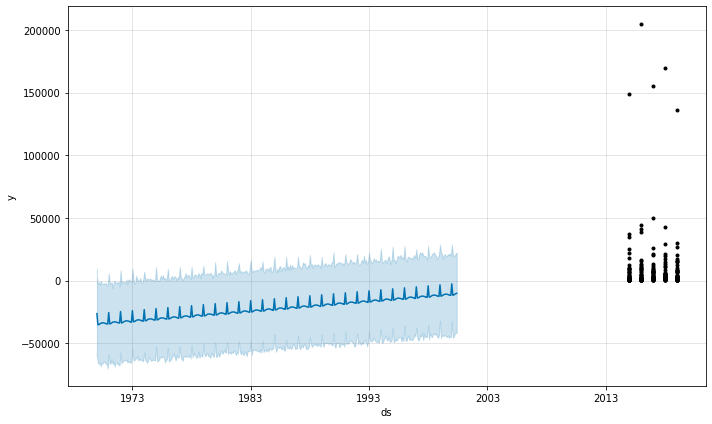

In [150]:
forecast[['ds','yhat_lower','yhat_upper','yhat']]
model.plot(forecast);

In [145]:
### The predict method will assign each row in future a predicted value which it names yhat
forecast = m.predict(future)
print("type of forecast" , type(future))
# print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


type of forecast <class 'pandas.core.frame.DataFrame'>


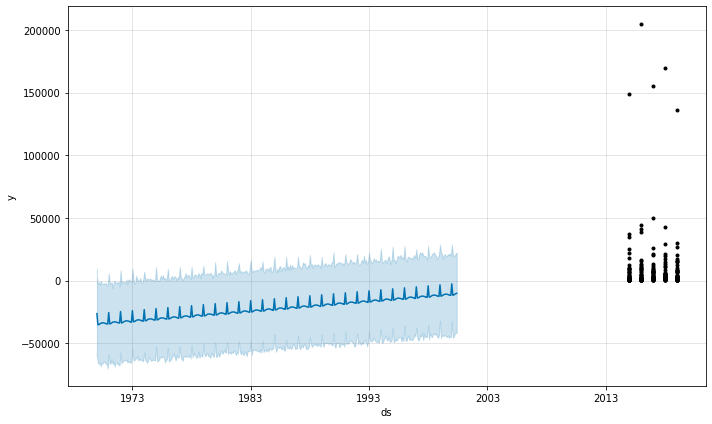

In [146]:
### Plotting forecast
fig1 = m.plot(forecast)
# fig1.show()
fig1.savefig('01_fbprophet.png')

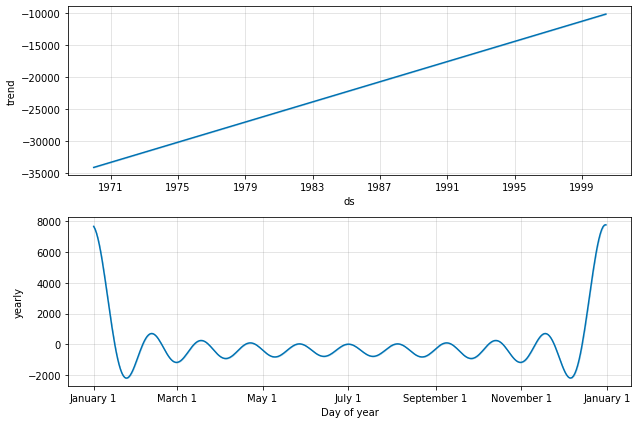

In [151]:
### Plotting forecast components
fig2 = m.plot_components(forecast)
fig2.savefig('01_fbprophet_02.png')

In [126]:
print('*** Program Completed ***')

*** Program Completed ***
